In [1]:
library(RPostgreSQL)
library(ontologyIndex)
library(ontologySimilarity)
library(data.table)

Loading required package: DBI


In [2]:
con = dbConnect(PostgreSQL(),dbname = 'yourdb', 
                 host = 'yourhost',
                 port = 0000)

In [3]:
go=get_ontology("ontologies/go.obo", propagate_relationships=get_relation_names("ontologies/go.obo")[-c(4)])
po=get_ontology("ontologies/po.obo", propagate_relationships=get_relation_names("ontologies/po.obo")[-c(4)])

Warning message in (function (parents, id = names(parents), name = id, obsolete = setNames(nm = id, :
“Some parent terms not found: NCBITaxon:3398, NCBITaxon:33090”

In [4]:
gos=get_ontology("slim/goslim_plant.obo", propagate_relationships=get_relation_names("ontologies/go.obo")[-c(4)])

In [5]:
goic=descendants_IC(go)
poic=descendants_IC(po)

In [6]:
go.no=go$id[! go$obsolete]
po.no=po$id[! po$obsolete]

In [7]:
gos.no=gos$id[! gos$obsolete]

In [8]:
length(gos.no)

[1] 108

In [9]:
big.p=list("plant anatomical entity"=c("PO:0025131"),"plant structure development stage"=c("PO:0009012"))
big.g=list("biological process"=("GO:0008150"),"molecular function"=("GO:0003674"),"cellular component"=c("GO:0005575"))

The `physcogrn.ontology` table is provided as a postgres plaintext dump as part of the data archive:
`genome_annotation/pg_dump.ontology.sql`

In [10]:
A=data.table(dbGetQuery(con,"select * from physcogrn.ontology"))
setkey(A,"geneid")

In [11]:
head(A)

geneid,id,name,ontology,partition,ic
Pp3c10_10040.mRNA,GO:0032502,developmental process,GO,biological_process,1.989205
Pp3c10_10040.mRNA,PO:0000006,plant protoplast,PO,plant anatomical entity,7.496097
Pp3c10_10040.mRNA,PO:0007134,sporophyte vegetative stage,PO,plant structure development stage,3.089378
Pp3c10_10040.mRNA,PO:0025017,plant spore,PO,plant anatomical entity,4.163893
Pp3c10_10040.mRNA,PO:0025075,non-vascular leaf,PO,plant anatomical entity,6.109803
Pp3c10_10040.mRNA,PO:0025094,sporangium,PO,plant anatomical entity,3.385223


The `physcogrn.dek1dge_full` table is provided as a postgres plaintext dump as part of the data archive:
`dge_analysis/pg_dump.dek1dge_full.sql.gz`

In [12]:
D=data.table(dbGetQuery(con,"select * from physcogrn.dek1dge_full where analysis = 'mutants' and qval_lrt < 0.1 "))
setkeyv(D,c("geneid"))
head(D)

analysis,comparison,geneid,test_stat,pval_lrt,qval_lrt,rss,sigma_sq_lrt,mean_obs_lrt,var_obs_lrt,⋯,degrees_free,pval_wt,qval_wt,b,se_b,mean_obs_wt,var_obs_wt,sigma_sq_wt,smooth_sigma_sq_wt,direction
mutants,deltaDEK_vs_OE,Pp3c10_10040.mRNA,17.930227,2.291527e-05,0.0001249302,1.8206054,0.08318425,5.044887,0.2883635,⋯,1,1.752075e-05,0.0001010254,-0.3666036,0.08536885,5.044887,0.2883635,0.04077941,0.03788209,down
mutants,WT_vs_deltaDEK,Pp3c10_10040.mRNA,13.237744,2.743679e-04,0.0022917472,0.8884109,0.03265385,4.974050,0.3080945,⋯,1,6.726152e-04,0.0053691432,0.2526475,0.07429706,4.974050,0.3080945,0.01242835,0.02898895,up
mutants,WT_vs_LG3,Pp3c10_10040.mRNA,17.190535,3.381168e-05,0.0005689445,2.6012278,0.11562669,5.169326,0.3094603,⋯,1,2.964255e-05,0.0005090674,0.4160538,0.09962509,5.169326,0.3094603,0.06123482,0.02801242,up
mutants,WT_vs_Loop,Pp3c10_10040.mRNA,21.635354,3.297181e-06,0.0001290050,1.1912682,0.04843375,5.158884,0.2764954,⋯,1,5.050722e-06,0.0001497580,0.3337355,0.07314479,5.158884,0.2764954,0.01228731,0.02915782,up
mutants,WT_vs_OE,Pp3c10_10040.mRNA,4.537398,3.316197e-02,0.0548333823,0.9454529,0.03820108,4.928547,0.2750458,⋯,1,1.759982e-01,0.3497000938,-0.1124199,0.08307835,4.928547,0.2750458,0.03625100,0.03697957,down
mutants,deltaDEK_vs_OE,Pp3c10_10095.C_D_box_snoRNA,9.841793,1.705911e-03,0.0043152115,1.9166657,0.02220745,2.709686,0.1332407,⋯,1,5.298674e-01,0.6699749532,-0.1185156,0.18865643,2.709686,0.1332407,0.02231886,0.16384365,down


In [13]:
DA=data.table(dbGetQuery(con,"select * from physcogrn.dek1dge_full join physcogrn.ontology using (geneid) where analysis = 'mutants' and qval_lrt < 0.1"))
setkeyv(DA,c("geneid","id"))
head(DA)

geneid,analysis,comparison,test_stat,pval_lrt,qval_lrt,rss,sigma_sq_lrt,mean_obs_lrt,var_obs_lrt,⋯,mean_obs_wt,var_obs_wt,sigma_sq_wt,smooth_sigma_sq_wt,direction,id,name,ontology,partition,ic
Pp3c10_10040.mRNA,mutants,deltaDEK_vs_OE,17.930227,2.291527e-05,0.0001249302,1.8206054,0.08318425,5.044887,0.2883635,⋯,5.044887,0.2883635,0.04077941,0.03788209,down,GO:0005634,nucleus,GO,cellular_component,4.345686
Pp3c10_10040.mRNA,mutants,WT_vs_deltaDEK,13.237744,2.743679e-04,0.0022917472,0.8884109,0.03265385,4.974050,0.3080945,⋯,4.974050,0.3080945,0.01242835,0.02898895,up,GO:0005634,nucleus,GO,cellular_component,4.345686
Pp3c10_10040.mRNA,mutants,WT_vs_LG3,17.190535,3.381168e-05,0.0005689445,2.6012278,0.11562669,5.169326,0.3094603,⋯,5.169326,0.3094603,0.06123482,0.02801242,up,GO:0005634,nucleus,GO,cellular_component,4.345686
Pp3c10_10040.mRNA,mutants,WT_vs_Loop,21.635354,3.297181e-06,0.0001290050,1.1912682,0.04843375,5.158884,0.2764954,⋯,5.158884,0.2764954,0.01228731,0.02915782,up,GO:0005634,nucleus,GO,cellular_component,4.345686
Pp3c10_10040.mRNA,mutants,WT_vs_OE,4.537398,3.316197e-02,0.0548333823,0.9454529,0.03820108,4.928547,0.2750458,⋯,4.928547,0.2750458,0.03625100,0.03697957,down,GO:0005634,nucleus,GO,cellular_component,4.345686
Pp3c10_10040.mRNA,mutants,deltaDEK_vs_OE,17.930227,2.291527e-05,0.0001249302,1.8206054,0.08318425,5.044887,0.2883635,⋯,5.044887,0.2883635,0.04077941,0.03788209,down,GO:0005829,cytosol,GO,cellular_component,5.809854


In [14]:
go_all=do.call(rbind.data.frame, lapply(seq_along(big.g),function(i) {
    terms=unique(intersection_with_descendants(go, big.g[[i]], A[ontology=="GO"][["id"]]))
    genes=unique(A[id %in% terms][["geneid"]])
    data.frame(partition=names(big.g)[i], nterms=length(terms),ngenes=length(genes))
}))
head(go_all)

partition,nterms,ngenes
biological process,4618,19967
molecular function,2441,15269
cellular component,974,24453


In [15]:
comp=unique(DA$comparison)
O="GO"
o=go
s=big.g
go_dge=do.call(rbind,lapply(comp,function(n) {
    do.call(rbind.data.frame, lapply(seq_along(big.g),function(i) {
        terms=unique(intersection_with_descendants(o, s[[i]], DA[ontology==O & comparison ==n][["id"]]))
        genes=unique(DA[id %in% terms & comparison ==n][["geneid"]])
        data.frame(partition=names(big.g)[i], comparison=n, nterms=length(terms),ngenes=length(genes))
        }))
}))
head(go_dge)

partition,comparison,nterms,ngenes
biological process,deltaDEK_vs_OE,4367,14226
molecular function,deltaDEK_vs_OE,2300,11023
cellular component,deltaDEK_vs_OE,939,14493
biological process,WT_vs_deltaDEK,4046,10378
molecular function,WT_vs_deltaDEK,2071,8052
cellular component,WT_vs_deltaDEK,880,10426


In [16]:
po_all=do.call(rbind.data.frame, lapply(seq_along(big.p),function(i) {
    terms=unique(intersection_with_descendants(po, big.p[[i]], A[ontology=="PO"][["id"]]))
    genes=unique(A[id %in% terms][["geneid"]])
    data.frame(partition=names(big.p)[i], nterms=length(terms),ngenes=length(genes))
}))
head(po_all)

partition,nterms,ngenes
plant anatomical entity,305,21795
plant structure development stage,191,21733


In [17]:
comp=unique(DA$comparison)
O="PO"
o=po
s=big.p
po_dge=do.call(rbind,lapply(comp,function(n) {
    do.call(rbind.data.frame, lapply(seq_along(s),function(i) {
        terms=unique(intersection_with_descendants(o, s[[i]], DA[ontology==O & comparison ==n][["id"]]))
        genes=unique(DA[id %in% terms & comparison ==n][["geneid"]])
        data.frame(partition=names(s)[i], comparison=n, nterms=length(terms),ngenes=length(genes))
        }))
}))
head(po_dge)

partition,comparison,nterms,ngenes
plant anatomical entity,deltaDEK_vs_OE,284,15205
plant structure development stage,deltaDEK_vs_OE,179,15186
plant anatomical entity,WT_vs_deltaDEK,282,11117
plant structure development stage,WT_vs_deltaDEK,180,11101
plant anatomical entity,WT_vs_LG3,253,6705
plant structure development stage,WT_vs_LG3,165,6694


In [18]:
X=data.frame(ontology="GO",merge(go_dge,go_all,by="partition",suffixes = c(".dge",".all")))
X=rbind(X,data.frame(ontology="PO",merge(po_dge,po_all,by="partition",suffixes = c(".dge",".all"))))
X$pterms=X$nterms.dge/X$nterms.all*100
X$pgenes=X$ngenes.dge/X$ngenes.all*100
head(X)
tail(X)

ontology,partition,comparison,nterms.dge,ngenes.dge,nterms.all,ngenes.all,pterms,pgenes
GO,biological process,deltaDEK_vs_OE,4367,14226,4618,19967,94.56475,71.24756
GO,biological process,WT_vs_Loop,3055,5220,4618,19967,66.15418,26.14314
GO,biological process,WT_vs_LG3,3384,6365,4618,19967,73.27848,31.87760
GO,biological process,WT_vs_deltaDEK,4046,10378,4618,19967,87.61369,51.97576
GO,biological process,WT_vs_OE,4266,12813,4618,19967,92.37765,64.17088
GO,cellular component,deltaDEK_vs_OE,939,14493,974,24453,96.40657,59.26880


,ontology,partition,comparison,nterms.dge,ngenes.dge,nterms.all,ngenes.all,pterms,pgenes
20,PO,plant anatomical entity,WT_vs_OE,285,13700,305,21795,93.44262,62.85845
21,PO,plant structure development stage,deltaDEK_vs_OE,179,15186,191,21733,93.71728,69.87530
22,PO,plant structure development stage,WT_vs_deltaDEK,180,11101,191,21733,94.24084,51.07900
23,PO,plant structure development stage,WT_vs_LG3,165,6694,191,21733,86.38743,30.80109
24,PO,plant structure development stage,WT_vs_Loop,167,5450,191,21733,87.43455,25.07707
25,PO,plant structure development stage,WT_vs_OE,178,13683,191,21733,93.19372,62.95955


In [19]:
library(ggplot2)

In [20]:
options(repr.plot.width=4, repr.plot.height=3)

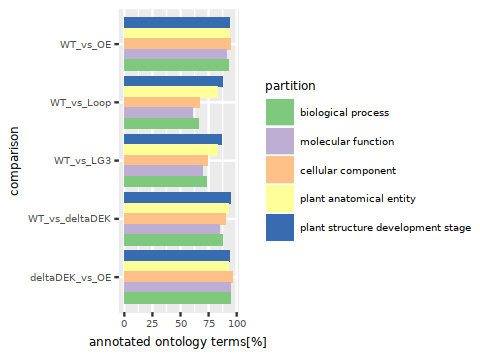

In [21]:
g=ggplot(X,aes(y=pterms,fill=partition,x=comparison))+geom_bar(stat="identity",position="dodge") +scale_fill_brewer(palette="Accent")+coord_flip() + ylab("annotated ontology terms[%]") +
theme(text = element_text(size=7))
print(g)

In [22]:
ggsave(g,file="percent_annotated.pdf",width=4,height=3)

In [23]:
X

ontology,partition,comparison,nterms.dge,ngenes.dge,nterms.all,ngenes.all,pterms,pgenes
GO,biological process,deltaDEK_vs_OE,4367,14226,4618,19967,94.56475,71.24756
GO,biological process,WT_vs_Loop,3055,5220,4618,19967,66.15418,26.14314
GO,biological process,WT_vs_LG3,3384,6365,4618,19967,73.27848,31.87760
GO,biological process,WT_vs_deltaDEK,4046,10378,4618,19967,87.61369,51.97576
GO,biological process,WT_vs_OE,4266,12813,4618,19967,92.37765,64.17088
GO,cellular component,deltaDEK_vs_OE,939,14493,974,24453,96.40657,59.26880
GO,cellular component,WT_vs_Loop,648,4966,974,24453,66.52977,20.30835
GO,cellular component,WT_vs_LG3,721,6241,974,24453,74.02464,25.52243
GO,cellular component,WT_vs_deltaDEK,880,10426,974,24453,90.34908,42.63690
GO,cellular component,WT_vs_OE,921,13078,974,24453,94.55852,53.48219
